# Get started 

## Overview

Spacy focused on production and shipping code, unlike its more academic predecessors. The most famous and frequently used python predecessors is NLTK. MLTK's main focus was providing students and researcher an idea of language processing. It never put any claims on **efficiency (speed)**, **model accuracy**, or **being an industrial-strength library**. With spacy, you can expect models to perform on real-world data, the code to be efficient, and the ability to process a huge amount of text data in a reasonable time.

Speed comparision

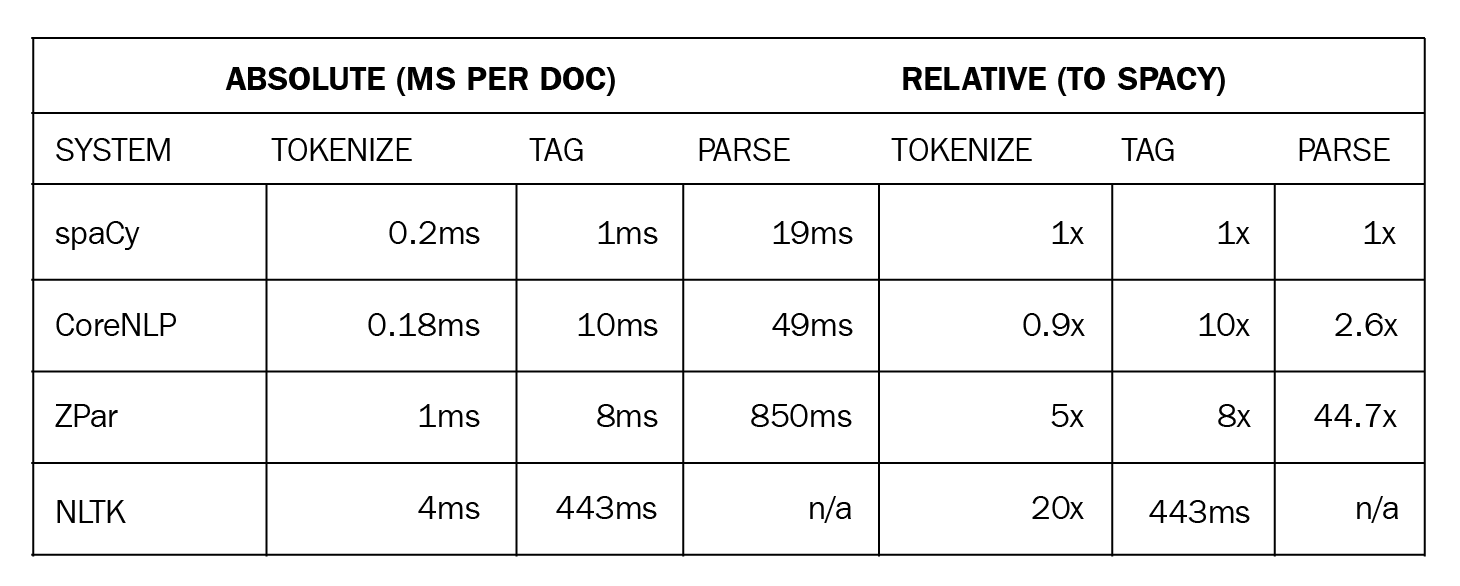

Features comparision

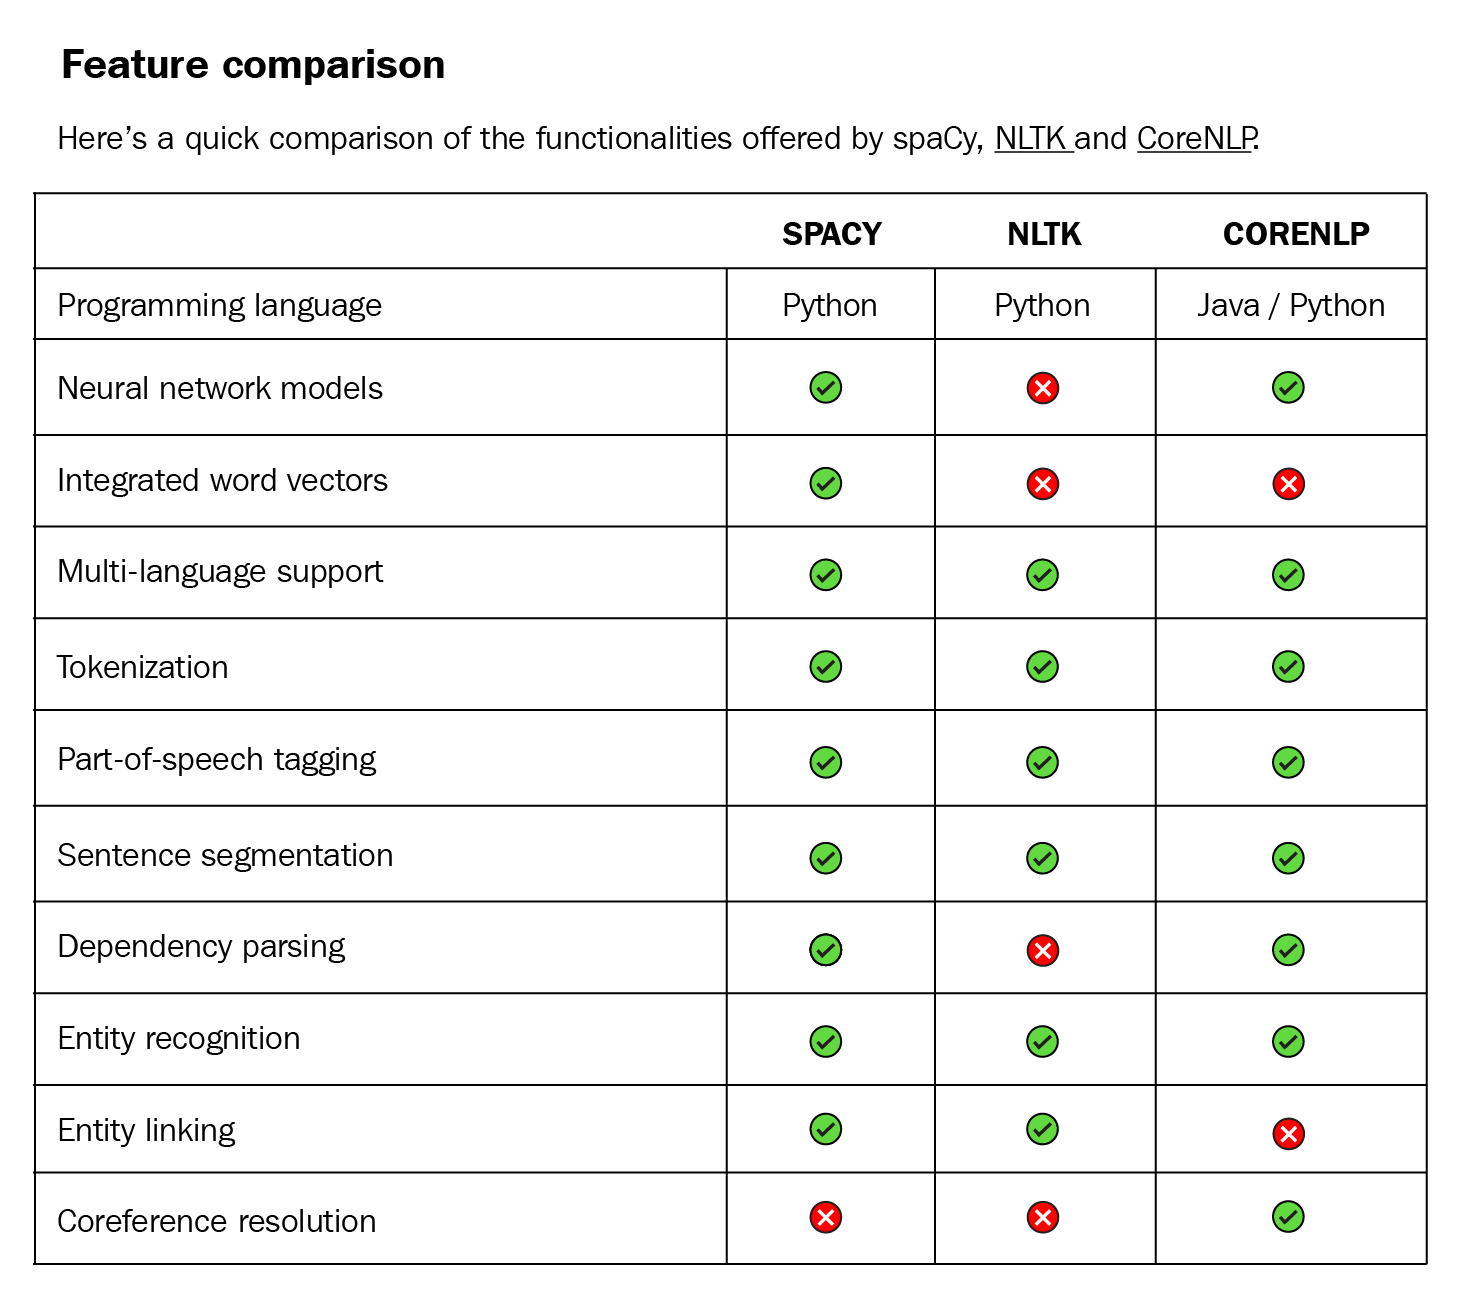

## Install 

- **Install spacy** 
- **Install spaCy's pre-trained model** 

Installing spaCy dosen't install spaCy's model. To install spaCy's model. we use
```python
python -m spacy download pretrained_model_name (for instance, en_core_web_md) 
```
These pre-trained models use the following naming convention:
- **Language**: Indicate the language code: en for English, de for German, and so on.
- **Type**: Indicate model capability: For instance, *core* means a general-purpose model for the vocabulary, syntax,  entities, vectors.
- **Genre**: The type of the text model recognizes: The genre can be web (Wikipedia), news (news, meida), Twitter, and so on.
- **Size**: Indicate the model size: *lg* for large size, *md* for medium size, *sm* for small size.

## Visualization with displaCy

We can visualize **syntactic parses** (POS tagging and dependence parsing) and **named entities**

You can think of named entities as proper nouns for important entities such as people's name, company's name, date, location,...

In [2]:
import spacy
from spacy import displacy 
nlp = spacy.load("en_core_web_sm")
doc = nlp("I worked for an American company Google from 2017to 2021")

In [3]:
displacy.render(doc, style='dep')

In [4]:
displacy.render(doc, style='ent')

# Core operations

All spaCy classes can be divided into two categories: **container objects** (data structures to represent text and language data) such as **Doc**,**Token**,**Vocab** and **processing pipeline components** such as **Language**.
```python
import spcay
# For example
nlp = spacy.load("en_core_web_sm") # return Language object
doc = nlp("I worked for an American company Google from 2017to 2021") # return Doc object
```
Some spaCy processing pipeline classes allow you to be more customizable.
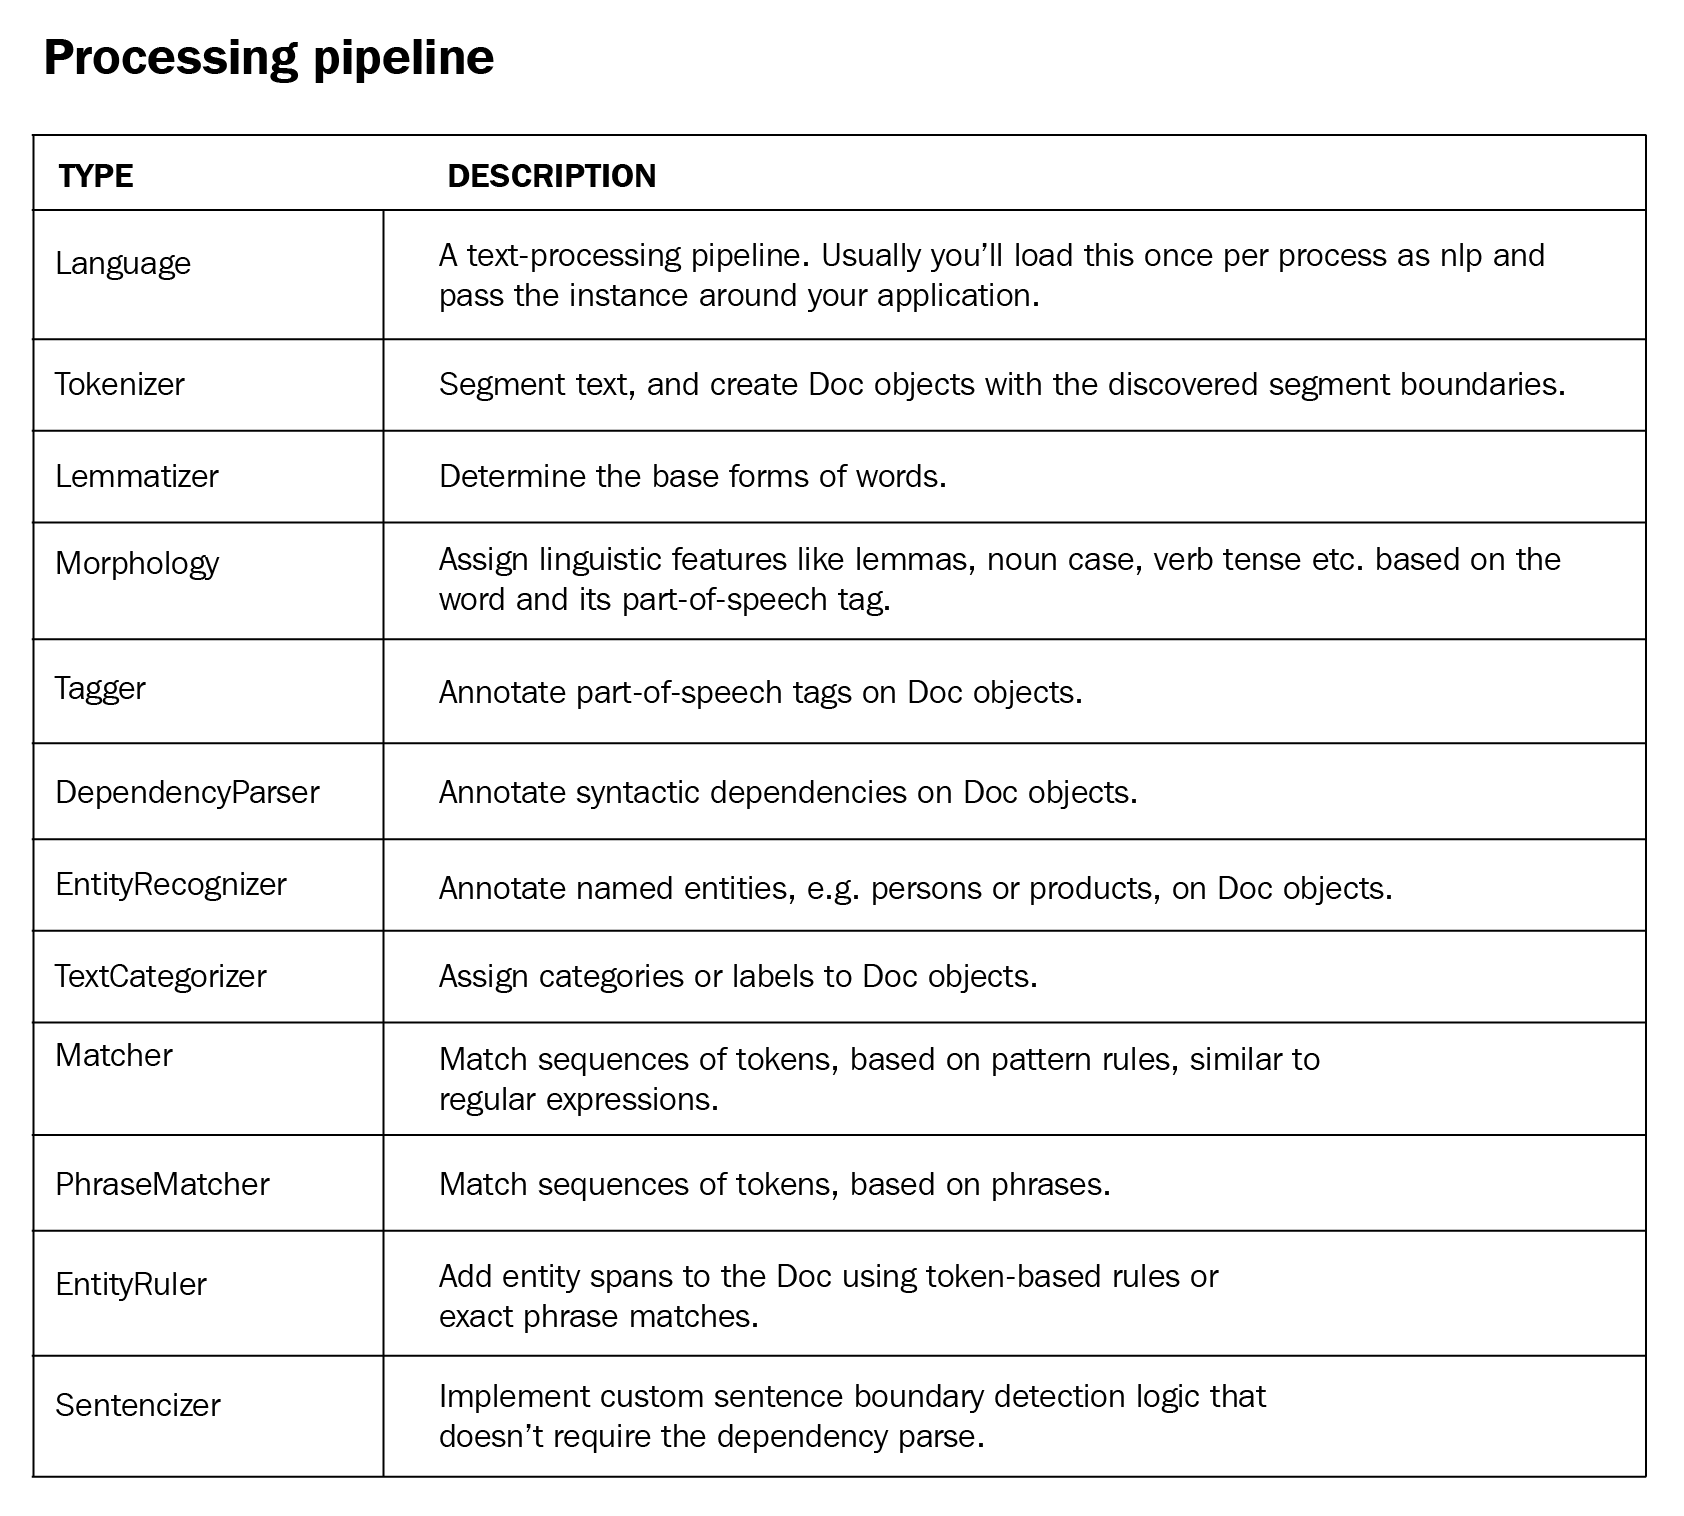

## Tokenization

spaCy's tokenizer doesn't only split by whitespace that is incorrect in many cases. Firstly, it splits text into token by whitespace. Then it checks whether each token is **exception**(it's, don't, abbreviations, and so on) or **prefixes**, **suffixes**, **infixes**. If it is, tokenizer would handle it. 

For example
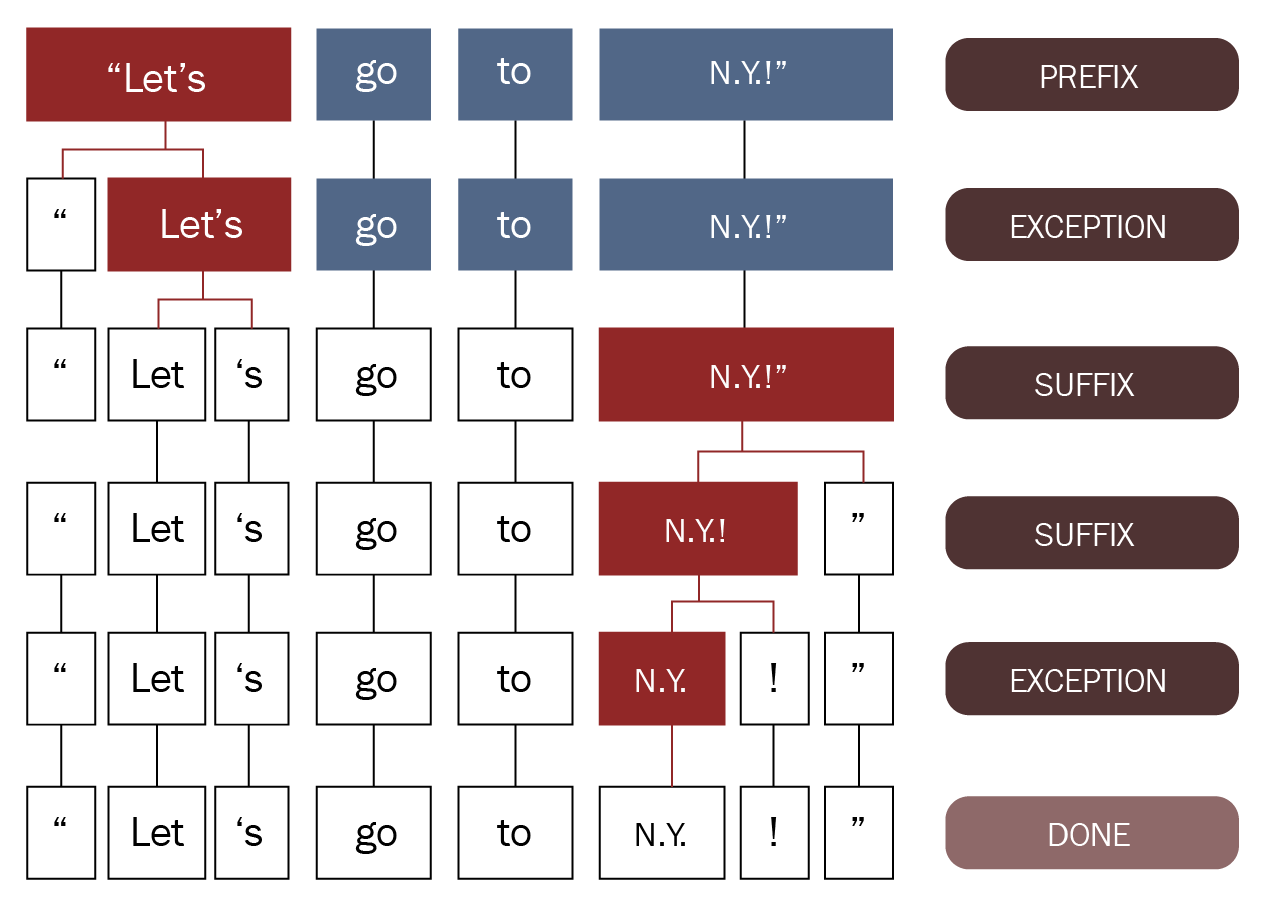

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')
text = "It's been a crazy week!!!!"
doc = nlp(text)
print([token.text for token in doc])
print(text.split(" "))

['It', "'s", 'been', 'a', 'crazy', 'week', '!', '!', '!', '!']
["It's", 'been', 'a', 'crazy', 'week!!!!']


### Customize the tokenizer

Some specific domain such as medicine, insurance, social have characteristic words and phrases that need custom tokenization rules. In spaCy, we can add special case rule to an existing tokenizers as following.

Pro tip: Modify the tokenizer by adding new rules only if you really need to. Trust me, you can get quite unexpected results with custom rules.

In [2]:
import spacy 
from spacy.symbols import ORTH #orthography
nlp = spacy.load("en_core_web_sm")
doc = nlp("lemme that")
print([w.text for w in doc])
special_case = [{ORTH: "lem"}, {ORTH: "me"}]
nlp.tokenizer.add_special_case("lemme", special_case)
print([w.text for w in nlp("lemme that")])

['lemme', 'that']
['lem', 'me', 'that']


### Sentence segmentation

A Doc object's sentence is available via **doc.sents** property.

spaCy uses dependence parser to perform sentence segmentation.

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "I flied to N.Y yesterday. It was around 5 pm."
doc = nlp(text)
for sent in doc.sents:
    print(sent.text)

I flied to N.Y yesterday.
It was around 5 pm.


## Lemmatization

**token.lemma_**

You also can add special rule for lemma using **nlp.tokenizer.add_special_case()**

In [10]:
import spacy
from spacy.symbols import ORTH, LEMMA
nlp = spacy.load('en_core_web_sm')
special_case = [{ORTH: 'Angeltown', LEMMA: 'Los Angeles'}]
nlp.tokenizer.add_special_case(u'Angeltown', special_case)
doc = nlp(u'I am flying to Angeltown')
for token in doc:
    print(token.text, token.lemma_)

ValueError: [E1005] Unable to set attribute 'LEMMA' in tokenizer exception for 'Angeltown'. Tokenizer exceptions are only allowed to specify ORTH and NORM.

### Lemmatization and stem 

Word's lemma is it's base form that appear in dictionary. For example, the lemma of eating, eats and ate are eat.
spaCy's lemmatizer works by looking up dictionary. Meanwhile, stemer don't know any thing about gramma. It simply trims most common prefixes and suffixes from the beginning or end of word. For instance, the stem of improvements, improve and improved are improv.

## spaCy container objects

We most widely use **Doc, Token and Span** objects in development, which represent **a document,a single token and a phrase, respectively**. A container can cantain other container objects, for instance a document contains Tokens and Spans. 

### Doc

doc = nlp('I like cat.')
- **doc.text**: return text string
- The building blocks of doc is Token objects,hence when you iterate doc you get Token objects as items.
- **doc.sents**: return an iterator to list of sentences.
- **doc.ents**: return a list of named entities of text - list of Span object.
- **doc.noun_chunks**: yield noun phrase found in the document.
- **doc.lang_**: return language
- **doc.to_json()**: convert Doc object to json.

### Token 

- **token.text**
- **token.i**: give index of token in doc.
- **token.idx**: provide the token's character offset (the character position) in doc.
- **token.doc**: return doc that created token.
- **token.sent**: return sentence that token belongs to 
- **token.lemma_**: give token's lemma 
- **token.is_sent_start**: return True if token is at the start of sentence.
- **token.ent_type**: named entity type
- features related to POS tagging 
- features come from dependence parsing.

### Span 

## More spaCy features

token.lower_, is_upper, is_lower, is_alpha, is_ascii, is_digit, is_punct, is_left_punct, 
is_right_punct, is_space, is_bracket, is_quote, is_currency, like_nume, like_url, is_oov, is_stop

# Linguistic features

spaCy's most commonly used features is **POS tagger**, **dependence parser**, **named entity recognition** and **merging/spliting**. And these features help a lot in **NLU** - neural language understanding

## POS tagging

**Syntax:**
- **token.tag_**: return tag in specific language. 
- **token.pos_**: return universal tag (all language use one common set of tags called universal tag).
- **spacy.explain(name_tag)**: provide explaination for tag.

**How it works:**

The tag of word depends on the other surrounding words and their tags. Tagger algorithm is a seq2seq model.
Seq2seq started with **Hidden-Markov-Model** in the early days and evolved to neural network - typically **LSTM**.

**Apllications:** 

- Word-sense disambiguation (WSD)

One word may have several meanings. Using tagger can identify which meanings is used. But, If two or more meanings have the same tag, tagger couldn't help us distinguish them.

Determining the sense of word can be crucial in search engine, machine translation and question-answering system.

- Verb tense and aspect

Verb tense contains information about time when action occur (past, future or ongoing). Using lemmatizer loses time information. Fortunately, word's tag still holds them

- Number, symbol and punct tags

spaCy has tag for special symbol such as number, currency, punct. These tag is very useful in some specific domain such as currency tag in finacial domain.

## Dependency parsing

A dependency relation is a directed link between 2 tokens of sentence. One of that 2 tokens is the **syntactic parent** (called **HEAD**), the other is its **dependent** (called **CHILD**). Each token has a dependency label(**CHILD**). You can access it via **token.dep_**. You also can get **HEAD** of token by calling **token.head**.

Each sentence/ phrase has only one token assigned **root** label. If sentence, the root token is main verb. If phrase, the root token is head noun of pharse.

The most usefull application is determining the subject and object of sentence.

## NER

Named entity always points to a **specific** entity. For example, capital is not a named entity.

You can access named entity of token via **token.ent_type_** or **doc.ents**, **doc.ents[index].label_**. 

SpaCy provides a very useful method for explaining named entity tag: **spacy.explain(named_entity_tag)**.

## Merging and splitting tokens

How about if we want to unite or split multiword named entities. And what if tokenizer performed this not so well on some exotic tokens and you want to split them by hand?

For merging and spliting the spans, we use **doc.retokenize.merge/split(span, attrs)**. *attrs* is a dictionary of attributes which we want to assign to new token such as lemma, pos, tag, ent_type.

Splitting is harder than merging. Because splitting changes the dependency relation of splitted tokens. And we need to assign new attributes for newly created token such as pos_, tag_, dep_, ent_type_ tag and so on 

In [5]:
import spacy 
nlp = spacy.load('en_core_web_sm')
# New Hampshire shoule be a single entity not two.
doc = nlp("She lived in New Hampshire.")
print("Before merging: \n", [(token.text, token.lemma_) for token in doc])
with doc.retokenize() as retokenizer: 
    attrs = {"LEMMA":"new hampshire"}
    retokenizer.merge(doc[3:5],attrs= attrs)
print("After merging: \n", [(token.text, token.lemma_) for token in doc])

Before merging: 
 [('She', 'she'), ('lived', 'live'), ('in', 'in'), ('New', 'New'), ('Hampshire', 'Hampshire'), ('.', '.')]
After merging: 
 [('She', 'she'), ('lived', 'live'), ('in', 'in'), ('New Hampshire', 'new hampshire'), ('.', '.')]


# Rule-based matching

**Rule-based information extraction** is indispensable for NLP application. Certain types of entities such as phone number, currency, times, dates have distinct format that can be recognized by a set of rules, without having to train statistical models.

Besides, combining rule-based matching lifts statistical models to **better accuracy**.

## Token-based matching

One of the most widely used tool for maching text is **regex**. A regex (regular expression) describes a set of string following a specified pattern. But a regex is usually unreadable, hard to debug. So spaCy provides a **Matcher** class for matching text that is clean, readable, production-level and add more features.

Unlike regex, **Matcher** class is able to match not only text itself but also its linguistic features such as tag, dep and so on. 

Token attributes for matcher
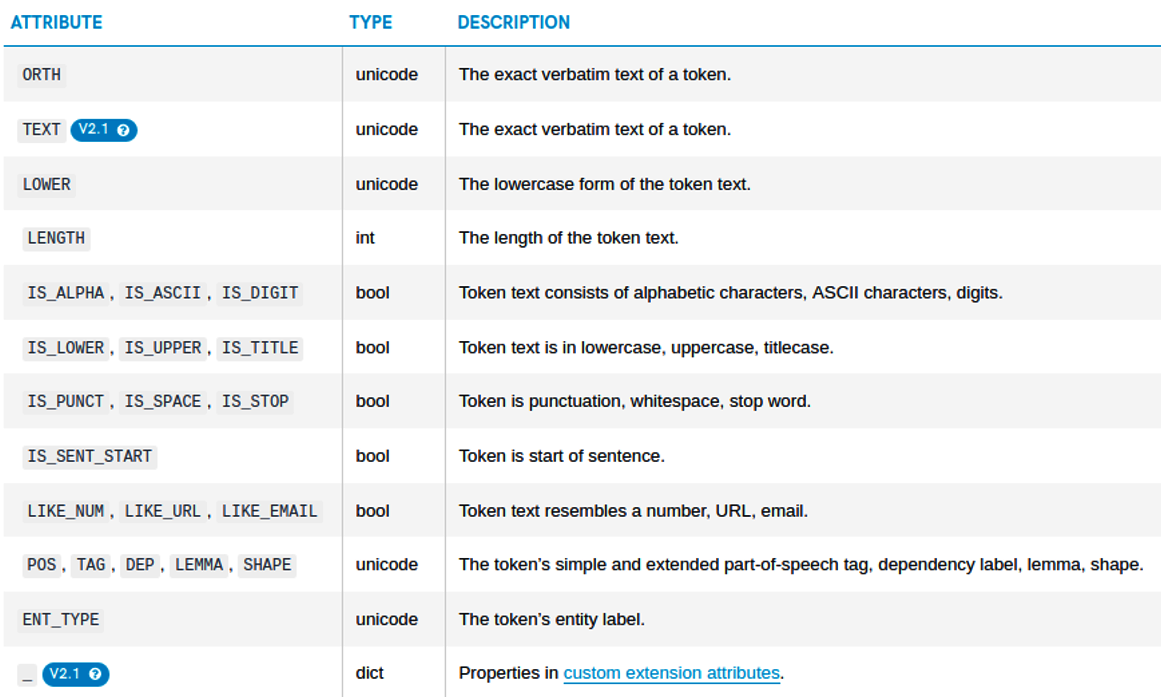

In [5]:
import spacy 
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
doc = nlp("Good morning, I want to reserve a ticket. I will then say good evening!")
# Initialize matcher object receiving vocab as parameter
matcher = Matcher(nlp.vocab)
# Defind pattern
# Pattern is a list of dict where each item represents one token 
pattern = [{"LOWER": "good", "IS_SENT_START": True}, 
           {}, # means any token
           {"LOWER": "morning"}, # If "LOWER":"want" --> matcher will match nothing.
           {"IS_PUNCT": True}]
# Add list of patterns to matcher object, morningGreeting is the name of macher object
matcher.add("morningGreeting", [pattern])
# Perform match on doc object 
matches = matcher(doc)
# A match result is a list of triplets in the form 
# (match id, start position, end position)
for match_id, start, end in matches:
    m_span = doc[start:end]
    print(start, end, m_span.text)

0 3 Good morning,


### More syntax support

- **Extended systex support** 

    Attributes: **IN, NOT_IN , ==, >=, <=, > , <**
```python
pattern = [{"LOWER": "good"},{"LOWER": {"IN": ["morning", "evening"]}}]
```

- **Regex-like operators**

    Attributes: **?, . , *, !**
```python
pattern = [{"LOWER": "barack"},
           {"LOWER": "hussein", "OP": "?"},
           {"LOWER": "obama"}]
```

- **Regex support** 
```python
pattern = [{"TAG": {"REGEX": "^V"}}]
```

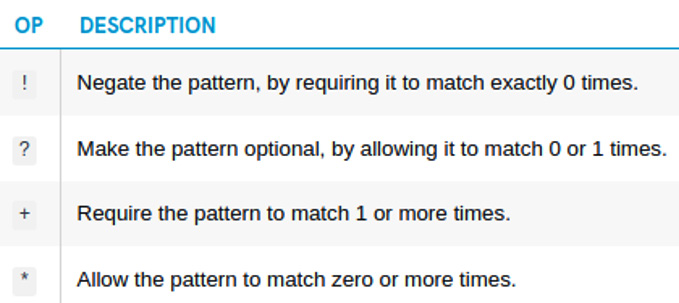

## PhraseMatcher

**PhraseMatcher** class helps us match **pharses** not only single token 

In [6]:
import spacy
from spacy.matcher import PhraseMatcher
nlp = spacy.load("en_core_web_sm")
# We can set attribute to PhraseMatcher object
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
terms = ["Angela Merkel", "Donald Trump", "Alexis Tsipras"]
# nlp.make_doc creates Doc object from each term
# pattern is a list of Doc object
patterns = [nlp.make_doc(term) for term in terms]
matcher.add("politiciansList", patterns)
doc = nlp("3 EU leaders met in Berlin. German chancellor Angela Merkel \
          first welcomed the US president Donald Trump. The \
          following day Alexis Tsipras joined them in Brandenburg.")
matches = matcher(doc)
for mid, start, end in matches:
    print(start, end, doc[start:end])

9 11 Angela Merkel
17 19 Donald Trump
24 26 Alexis Tsipras


## EntityRuler

spacy"s **EntityRuler** class allows us to **add rules** on the top of statistical model and create an  even more powerful **NER** model.

**EntityRuler** isnot a **Matcher**. It is a **pipeline component** that we can add to our pipeline via **nlp.add_pipe**. When EntityRuler find a match, the match is appended to *doc.ents* and *ent_type* will be label that we pass in the patter.

In [2]:
import spacy 

nlp = spacy.load("en_core_web_sm")
doc = nlp("I have an acccount with chime since 2017")
print("Initial doc's entity: \n",doc.ents)

# Specify pattern 
patterns = [{"label": "ORG","pattern": [{"LOWER": "chime"}]}]
# Add EntityRuler to pipeline
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)
doc = nlp("I have an acccount with chime since 2017")
print("Doc's entity after adding rules: \n", doc.ents)

Initial doc's entity: 
 (2017,)
Doc's entity after adding rules: 
 (chime, 2017)


## Real-world example 

- **Extract IBAN and account number** 

    IBAN means a international number of bank account numbers

```python
doc = nlp("My IBAN number is FR76 3000 6000 0112 3456 7890 189, please send the money there.")
pattern = [{"SHAPE": "XXdd"},{"TEXT": {"REGEX": "\d{1,4}"}, "OP":"+"}]
```
```python
doc = nlp("My account number is 8921273.")
pattern = [{"LOWER": "account"},{"LOWER": {"IN": ["num", "number"]}},{},{"IS_DIGIT": True}]
# return account number is 8921273
```

- **Extract phone numbers**

```python
doc = nlp("You can call me on (221) 102 2423 or text me.")
pattern = [{"TEXT": "+1", "OP": "?"}, {"TEXT": "("},
           {"SHAPE": "ddd"}, {"TEXT": ")"},
           {"SHAPE": "ddd"}, {"TEXT": "-", "OP": "?"},
           {"SHAPE": "dddd"}]
```

- **Extract mentions**

    Mainly in social media posts
    
```python
text1 = "CafeA is very generous with the portions."
text2 = "CafeB is horrible, we waited for mins for a table."
# The most probably patter of above sentences is 
# BusinessName is/was/be adverb*adjective
pattern = [{"ENT_TYPE": "ORG"}, {"LEMMA": "be"}, 
           {"POS": "ADV", "OP":"*"}, {"POS": "ADJ"}]
```

- **Hashtag and emoji extraction**

    Processing social media text is a hot topic and has some challenges. The hashtag refers to the subject/topic/object of the sentence. Enoji assgins the sentiment of sentence and is useful in sentiment analysis.
    
```python
# Extract hashtag
doc = nlp("Start working out now #WeekendShred")
pattern = [{"TEXT": "#"}, {"IS_ASCII": True}]
```
```python
# Extract emoji
pos_emoji = [" ", " ", " ", " ", " ", " "]
neg_emoji = [" ", " ", " ", " ", " ", " "]
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]
```

- **Expanding named entity**

```python
doc = nlp("Ms. Smith left her house 2 hours ago.")
patterns = [{"label": "TITLE", "pattern": [{"LOWER": 
                                            {"IN":["ms.", "mr.", "mrs.", "prof.", "dr."]}}]}]
```

- **Combine lingustic features and named entity**

    Here, we **combined** **POS tag** information, **dependency labels** (hence syntactic information
of the sentence), and **named entities**

```python
doc = nlp("Einstein lived in Zurich.")
person_ents = [ent for ent in doc.ents if ent.label_ =="PERSON"]
for person_ent in person_entities:
    #We use head of the entity's last token
    head = person_ent[-1].head
    If head.lemma_ == "live":
    #Check if the children of live contains prepositional attachment
    preps = [token for token in head.children if token.dep_ =="prep"]
    for prep in preps:
        places = [token for token in prep.children if token.ent_type_ == "GPE"]
        # Verb is in past or present tense
        print({'person': person_ent, 'city': places,'past': head.tag_ == "VBD"})
```

# Word vectors and semantic similarity

Word vector is the presentation of text. The basic principle is that similar words that appear in the similar context have similar vectors

**Pro tip:**

When we say about similar words, the first concept that comes to mind is **synonymity**. But how about **antonyms**? For example: 
- I hate cats.
- I love cats.

Hate and love appears in similar context, hence they have the similar word vector :))). If your downstream NLP task is sensitive in this aspect, be careful while using word vectors. In this case, always either train your own word vector (can use **gensim** package) or refine your words vectors by training them in the downstream task

## Using spaCy's pretrained vectors

**Word vectors are part of spacy's models** and can be generated using an algorithm like [word2vec](https://en.wikipedia.org/wiki/Word2vec). For instance, the *en_core_web_md* model ships with 300-dimensional word vectors for 20000 vocabulary, while the *en_core_web_lg* ships with 300-dimentional word vectors for 685.000 vocabulary. But small model such as *en_core_web_sm* don't include any word vectors, but include context-sensitive tensors. You can still make the following semantic similarity calculations, but the results won't be as accurate as word vector computation.

**Syntax**:
- **token.vector** : return word vector of token in the form of numpy array 
- **doc/span.vector**: return average of its words's vectors
- **token.is_oov** or **token.has_vector**: to check whether token has vector, because only words in models's vocabulary have vector.

**The similarity method**:

spaCy uses **cosine similarity** to compute the semantic similarity.

Each container object has a similarity method that allows us to calculate the similarity between container objects by comparing their word vectors.

```python
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.")
doc1[1:3].similarity(doc2[1:4])
0.6539691
```

[**Some notes about similarity results**](https://spacy.io/usage/linguistic-features#similarity-expectations)

[**Adding custom word vectors**](https://spacy.io/usage/linguistic-features#adding-vectors)

## Advanced semantic similarity

### Euclidian vs cosine distance 

**Recommendation: cosine distance** (cosine distance = 1 - cosine similarity)

Euclidian distance has no idea of **vector orientation**, what matter is **vector magnitude**. It's the main disadvantage of Euclidian distance. For example, similarity(dog, cat) should be approximate to similarity(dog canine terrier) because of the similarity between dog and dog canine terrier. If using euclide distance, similarity(dog canine terrier, cat) = dist 2 >> similarity(dog, cat) = dist 1. While using cosine distance, similarity(dog canine terrier, cat) = similarity(dog, cat)

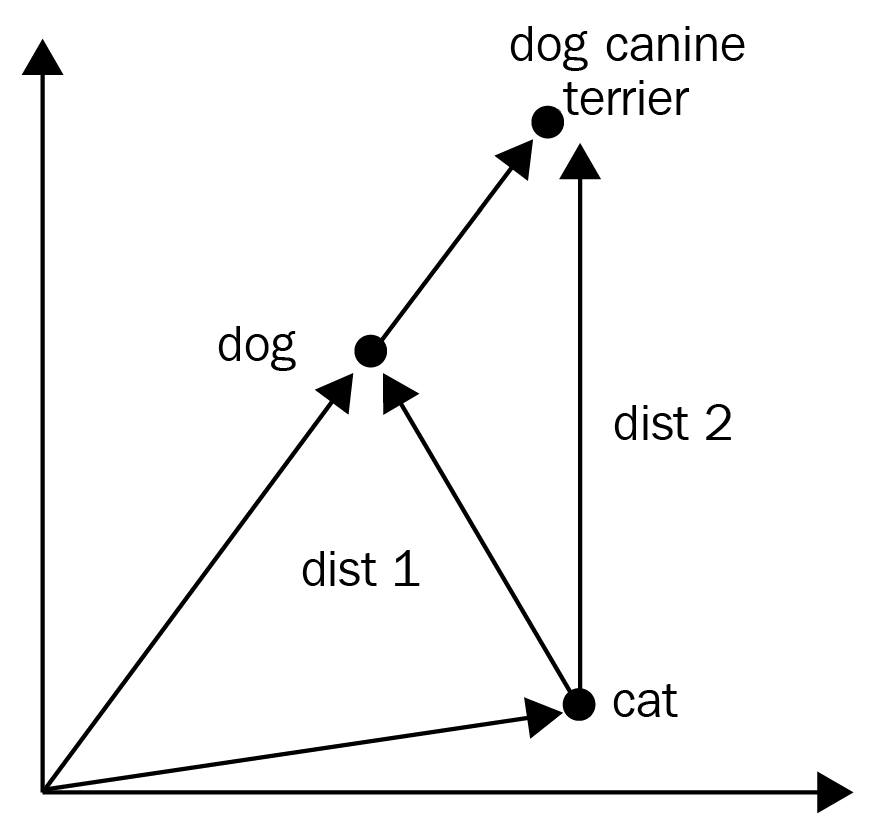

### Tips for improving text categorizing performance

Text categorize is usually a noun.

Thers's a potential problem with comparing the key (text categorize) to the whole sentence. In practice, we occasionally deal with long texts. Averaging over a very long text lower the importance of key words. So we should extract key words of the sentence and compare it with the key, instead of comparing the whole sentence itself.

Because text categorize is a noun, noun phrases carry most information. To extract noun pharse, we can use **doc.noun_chunks**. In some cases, instead of extracting every noun, we will only focus on the proper nouns; hence, we want to **extract named entities**.

# Customizing spaCy model